In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset from seaborn

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
sns.get_data_home()

'C:\\Users\\USER\\seaborn-data'

In [8]:
df = sns.load_dataset('flights')
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth', inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

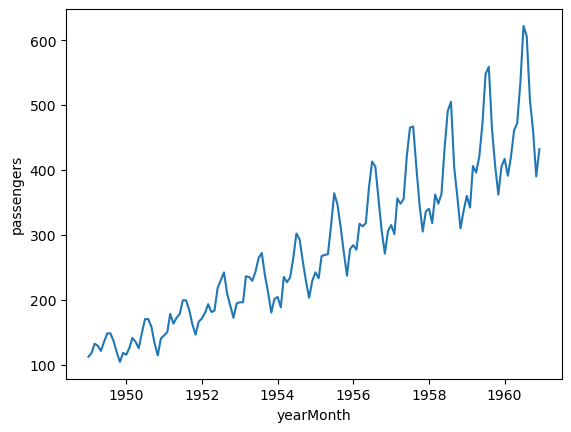

In [9]:
sns.lineplot(data=df,x=df.index,y=df.passengers)

## Lets check the stationarity of the time series data

To assess stationarity, we examine if the mean and variance of a time series remain constant over time. This can be verified through methods like the Augmented Dickey Fuller Test (ADF) and Rolling Statistics. In the ADF test, if the test statistic is less than the critical value, we reject the null hypothesis, indicating non-stationarity. Conversely, if the test statistic exceeds the critical value, we fail to reject the null hypothesis, suggesting stationarity.

### Rolling Statistics

In [10]:
df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

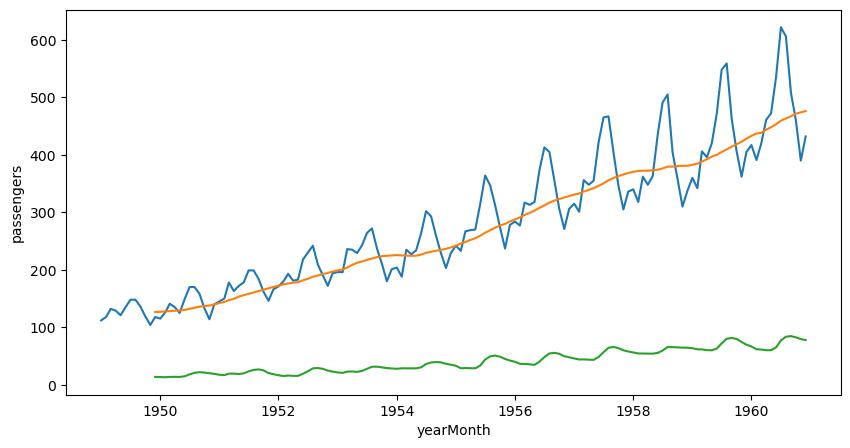

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollStd)

### Augmented Dickey Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adfTest = adfuller(df['passengers'],autolag='AIC')

In [16]:
adfTest

(0.8153688792060451,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [19]:
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [21]:
for key, values in adfTest[4].items():
    print('criticality',key,':', values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


In [25]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,':', values)
    
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


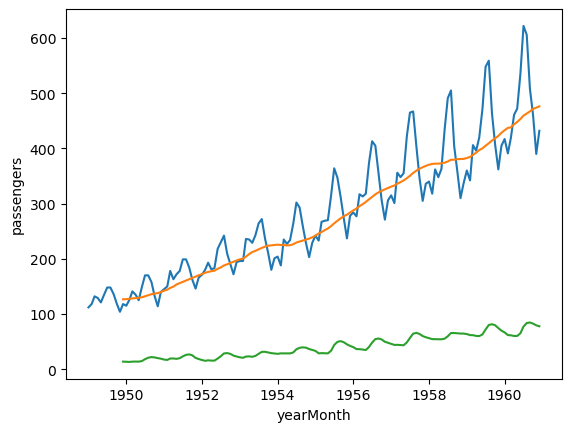

In [27]:
test_stationarity(df, "passengers")

In [29]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Lets make the data stationary

For making data stationary we can use time shift, log, Square Root and Cube Root.

In [31]:
# time shift

air_df['shift'] = air_df.passengers.shift()
air_df['shiftdiff'] = air_df.passengers - air_df['shift']
air_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15680\1673650889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.passengers.shift()
C:\Users\USER\AppData\Local\Temp\ipykernel_15680\1673650889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftdiff'] = air_df.passengers - air_df['shift']


,passengers,shift,shiftdiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.657779
p-value                          0.081634
#lags used                      12.000000
number of observations used    119.000000
dtype: float64
criticality 1% : -3.4865346059036564
criticality 5% : -2.8861509858476264
criticality 10% : -2.579896092790057


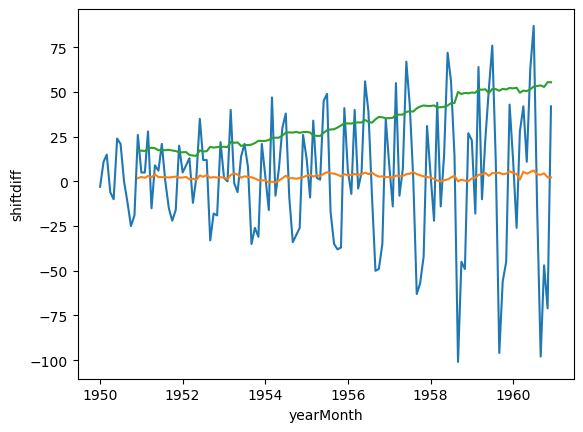

In [33]:
test_stationarity (air_df.dropna(), 'shiftdiff')

In [35]:
# log
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15680\4281348066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


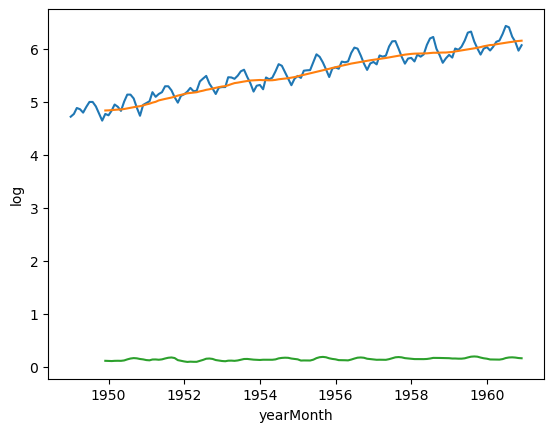

In [37]:
test_stationarity(log_df, 'log')

In [38]:
# square root

sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15680\1857173650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['passengers'])


,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


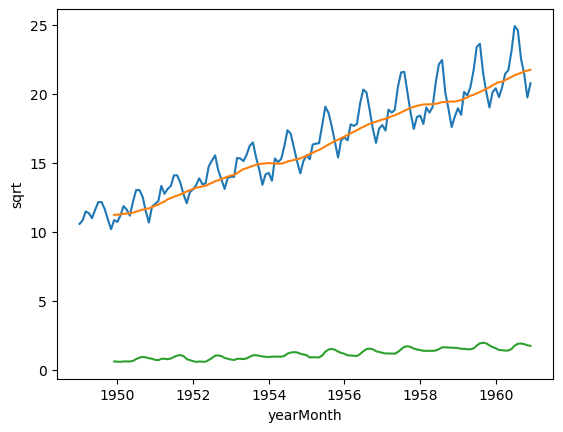

In [39]:
test_stationarity(sqrt_df, 'sqrt')

In [41]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(df['passengers'])
cbrt_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15680\1590778761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(df['passengers'])


,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


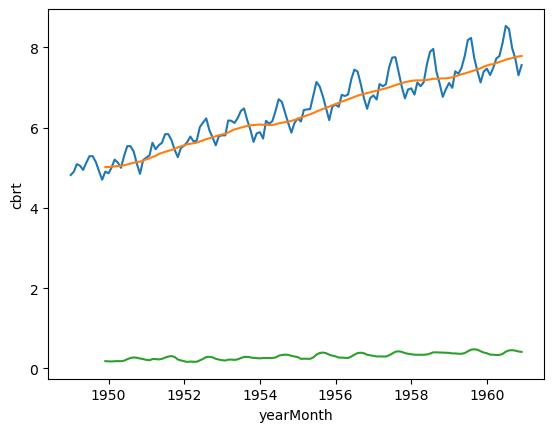

In [42]:
test_stationarity(cbrt_df, 'cbrt')

In [49]:
# log & sqrt

log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15680\895106553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,passengers,log,log_sqrt
yearMonth,,,
1949-01-01,112,4.718499,2.172211
1949-02-01,118,4.770685,2.184190
1949-03-01,132,4.882802,2.209706
1949-04-01,129,4.859812,2.204498
1949-05-01,121,4.795791,2.189929


Test Statistic                  -1.942528
p-value                          0.312326
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


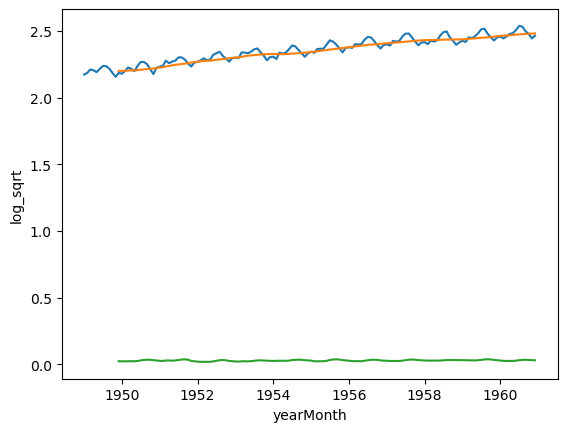

In [50]:
test_stationarity(log_df2, 'log_sqrt')

In [46]:
# log & sqrt & shift

log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15680\1401897905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,passengers,log,log_sqrt,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_15680\3245097557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -3.071912
p-value                          0.028703
#lags used                      13.000000
number of observations used    118.000000
dtype: float64
criticality 1% : -3.4870216863700767
criticality 5% : -2.8863625166643136
criticality 10% : -2.580009026141913


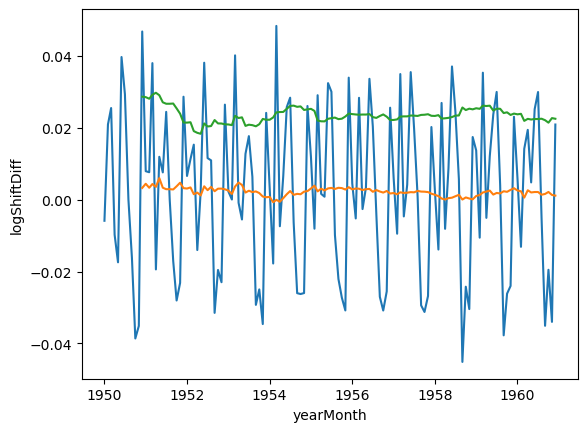

In [48]:
test_stationarity(log_df2.dropna(), "logShiftDiff")

## ARIMA Model

lets create a subset of original data by using copy function and "deep" attribute

In [53]:
airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12)
airP.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [77]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


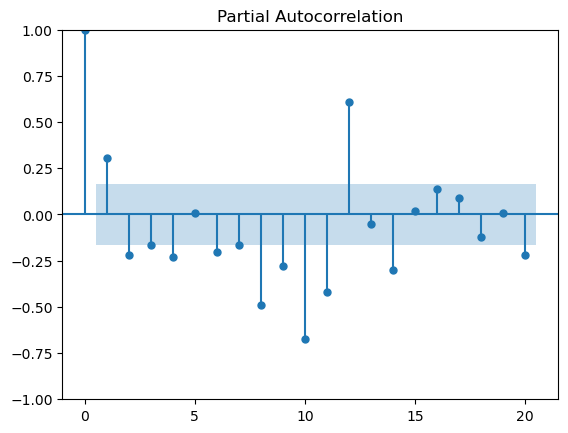

In [78]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);

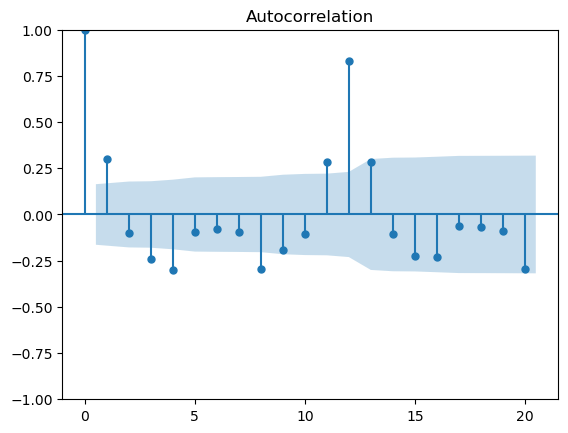

In [79]:
plot_acf(airP['firstDiff'].dropna(),lags=20);

In [142]:
# p = 1, q = 2, d = 1

In [143]:
train = airP[:round(len(airP)*(70/100))]
test = airP[round(len(airP)*(70/100)):]

test.head()

,passengers,firstDiff,Diff12,arimaPred,sarimaxPred
yearMonth,,,,,
1957-06-01,422,67.0,48.0,363.295709,405.831728
1957-07-01,465,43.0,52.0,351.699792,449.999513
1957-08-01,467,2.0,62.0,346.961970,441.783132
1957-09-01,404,-63.0,49.0,344.344094,390.855710
1957-10-01,347,-57.0,41.0,342.897590,345.535969


In [144]:
from statsmodels.tsa.arima.model import ARIMA

# Create an ARIMA model instance
model = ARIMA(train['passengers'], order=(1, 1, 2))

# Fit the ARIMA model to the training data
model_fit = model.fit()

# Make predictions on the test data
start_index = test.index[0]
end_index = test.index[-1]
predictions = model_fit.predict(start=start_index, end=end_index)

# Assign predictions to a new column in the DataFrame
airP['arimaPred'] = predictions

# Display the tail of the DataFrame
print(airP.tail())


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  firstDiff  Diff12  arimaPred  sarimaxPred
yearMonth                                                        
1960-08-01         606      -16.0    47.0  340.36032   598.356396
1960-09-01         508      -98.0    45.0  340.36032   533.986160
1960-10-01         461      -47.0    54.0  340.36032   478.760114
1960-11-01         390      -71.0    28.0  340.36032   431.405099
1960-12-01         432       42.0    27.0  340.36032   476.767961


<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

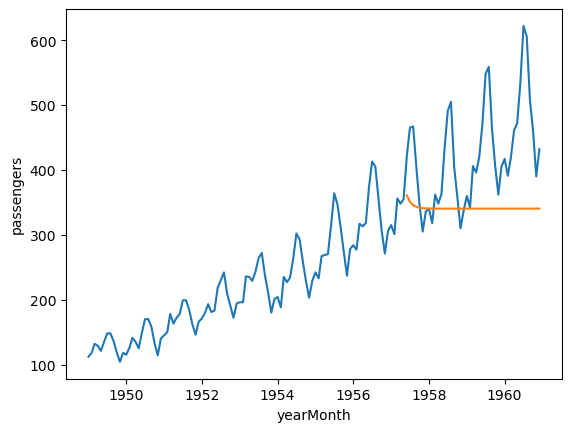

In [145]:
airP.dropna()
sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='arimaPred')

In [146]:
from sklearn.metrics import mean_squared_error

In [147]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

27.476402181850364

In [148]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


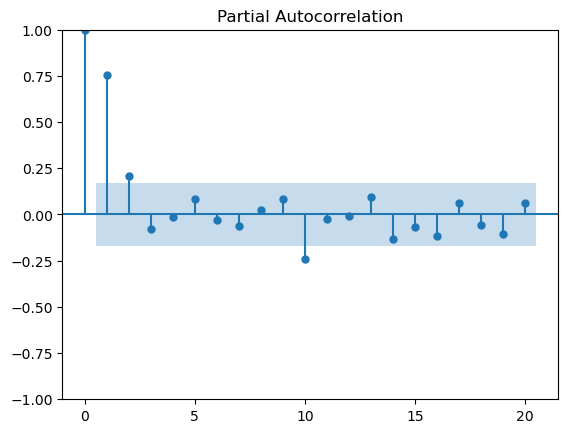

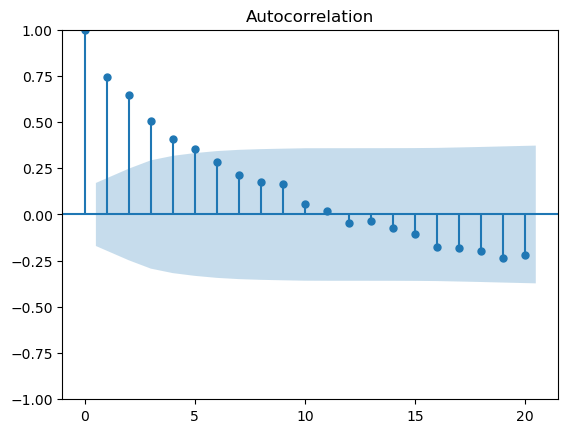

In [149]:
plot_pacf(airP['Diff12'].dropna(),lags=20);
plot_acf(airP['Diff12'].dropna(),lags=20);

In [150]:
model = SARIMAX(train['passengers'],order=(1,1,2),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [151]:
airP.tail()

,passengers,firstDiff,Diff12,arimaPred,sarimaxPred
yearMonth,,,,,
1960-08-01,606,-16.0,47.0,340.36032,599.400904
1960-09-01,508,-98.0,45.0,340.36032,534.535439
1960-10-01,461,-47.0,54.0,340.36032,479.281842
1960-11-01,390,-71.0,28.0,340.36032,432.252820
1960-12-01,432,42.0,27.0,340.36032,477.539502


<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

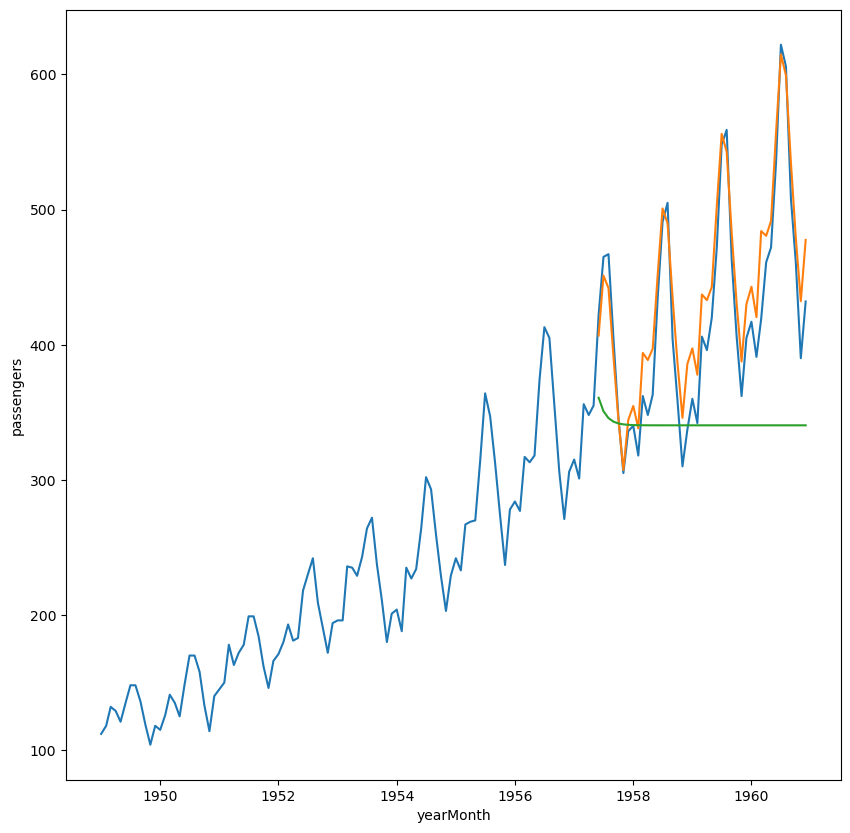

In [152]:
airP.dropna()
plt.figure(figsize=(10,10))
sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')
sns.lineplot(data=airP, x=airP.index, y='arimaPred')

In [153]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

27.629122818302886

In [154]:
airP.tail()

,passengers,firstDiff,Diff12,arimaPred,sarimaxPred
yearMonth,,,,,
1960-08-01,606,-16.0,47.0,340.36032,599.400904
1960-09-01,508,-98.0,45.0,340.36032,534.535439
1960-10-01,461,-47.0,54.0,340.36032,479.281842
1960-11-01,390,-71.0,28.0,340.36032,432.252820
1960-12-01,432,42.0,27.0,340.36032,477.539502


In [155]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


<AxesSubplot:>

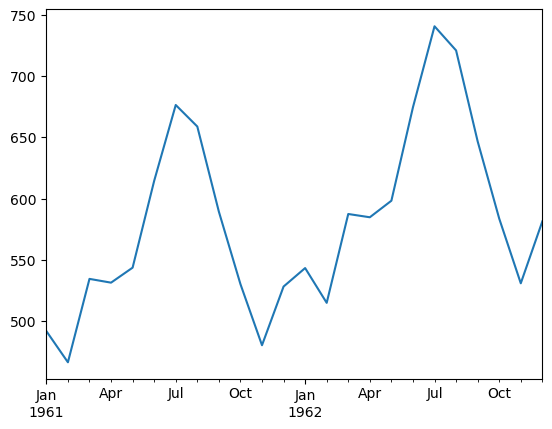

In [156]:
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot()

<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

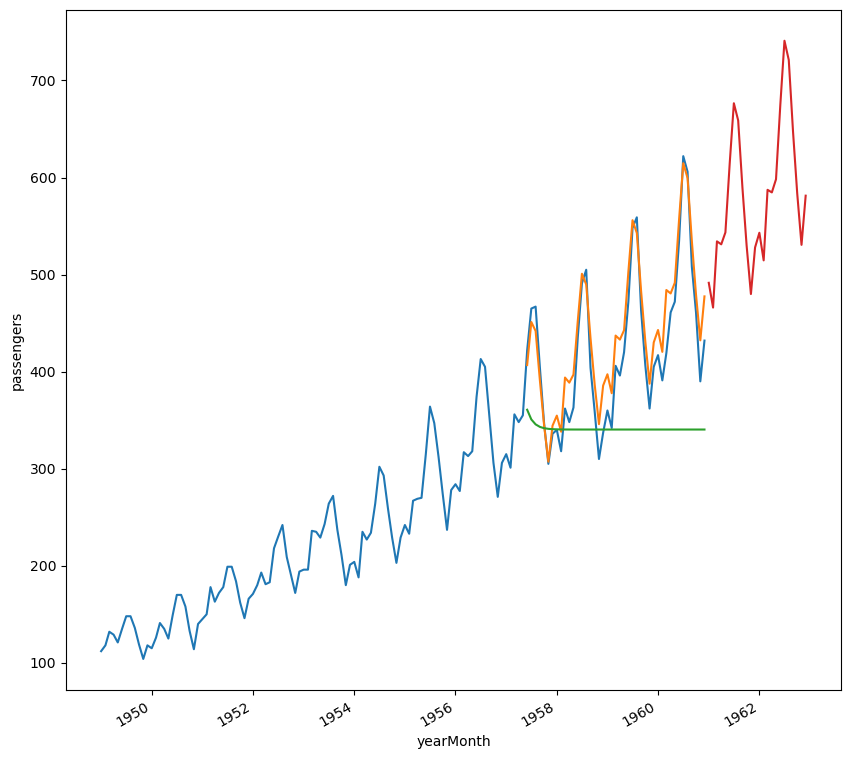

In [157]:
airP.dropna()
plt.figure(figsize=(10,10))
sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')
sns.lineplot(data=airP, x=airP.index, y='arimaPred')
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot()